In [352]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import requests
import seaborn as sns

In [353]:
url = 'https://www.datosdeciclismo.com/api/actividades/?atleta=&a%C3%B1o=&mes=&dia=&tipo='

In [354]:
contenido = requests.get(url).text

In [355]:
objeto = json.loads(contenido)

In [356]:
lista = []

In [357]:
for i in range(len(objeto)):
    
    id = [*objeto.keys()][i]
    fecha = [*objeto.values()][i]['Fecha']
    año = [*objeto.values()][i]['Año']
    mes = [*objeto.values()][i]['Mes']
    dia = [*objeto.values()][i]['Día']
    tipo = [*objeto.values()][i]['Tipo']
    altura = [*objeto.values()][i]['Altura']
    cadencia = [*objeto.values()][i]['Cadencia']
    distancia = [*objeto.values()][i]['Distancia']
    potencia = [*objeto.values()][i]['Potencia']
    pulsaciones = [*objeto.values()][i]['Pulsaciones']
    tiempo = [*objeto.values()][i]['Tiempo']
    velocidad = [*objeto.values()][i]['Velocidad']
    atleta = [*objeto.values()][i]['Atleta']
        
    lista.append([id,fecha,año,mes,dia,tipo,altura,cadencia,distancia,potencia,pulsaciones,tiempo,velocidad,atleta])


In [358]:
df = pd.DataFrame(lista, columns=("Id","Fecha","Año","Mes","Día","Tipo","Altura","Cadencia","Distancia","Potencia","Pulsaciones","Tiempo","Velocidad","Atleta"))

In [359]:
df.head()

,Id,Fecha,Año,Mes,Día,Tipo,Altura,Cadencia,Distancia,Potencia,Pulsaciones,Tiempo,Velocidad,Atleta
0,979,20210828,2021,8,28,Virtual,192.0,85.4,75.48,155.9,98.3,8403.0,32.34,Fernando Gonzalez
1,976,20210827,2021,8,27,Virtual,102.0,83.7,35.66,208.5,117.8,3611.0,35.55,Fernando Gonzalez
2,977,20210827,2021,8,27,Virtual,77.0,86.1,13.16,201.8,114.1,1202.0,39.41,Fernando Gonzalez
3,978,20210827,2021,8,27,Virtual,219.0,86.8,33.13,194.3,112.0,3011.0,39.61,Fernando Gonzalez
4,1569,20210827,2021,8,27,Ruta,0.0,76.8,0.00,171.8,121.4,4503.0,0.00,Renzo Gherbassi


In [360]:
df = df.loc[(df['Cadencia'] > 0)]

In [361]:
df = df.loc[(df['Potencia'] > 0)]

In [362]:
df = df.loc[(df['Pulsaciones'] > 0)]

In [363]:
df = df.loc[(df['Tiempo'] > 0)]

In [364]:
df['Tiempo'] = df['Tiempo']/3600

In [365]:
df.describe()

,Año,Mes,Día,Altura,Cadencia,Distancia,Potencia,Pulsaciones,Tiempo,Velocidad
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,2020.701740,6.241922,15.559238,182.317978,81.321044,45.785418,166.983927,131.151284,1.666801,27.042983
std,0.457684,3.345916,9.021878,205.182992,8.682118,33.650329,43.350265,19.742045,1.230415,12.845551
min,2020.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.700000,84.700000,0.010278,0.000000
25%,2020.000000,3.000000,8.000000,34.000000,77.700000,16.970000,142.600000,115.450000,0.987361,21.710000
50%,2021.000000,6.000000,15.000000,123.000000,82.600000,42.670000,167.000000,127.800000,1.392778,30.830000
75%,2021.000000,9.000000,23.000000,266.000000,87.000000,73.190000,196.300000,145.750000,2.122361,36.540000
max,2021.000000,12.000000,31.000000,2120.000000,100.300000,162.060000,292.200000,195.400000,11.694167,44.740000


In [366]:
df_año_mes_tipo = df.groupby(["Año","Mes","Tipo"], as_index = False).sum()

In [367]:
df_año_mes_tipo['Mes'] = df_año_mes_tipo['Año'].astype(str) + " - " + df_año_mes_tipo['Mes'].astype(str)

Text(0, 0.5, 'Distancia (Km)')

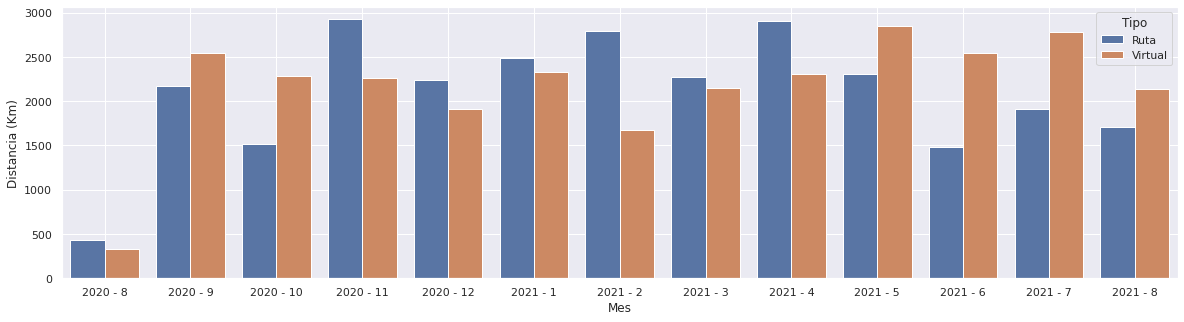

In [368]:
plt.figure(figsize = (20,5))
ax = sns.barplot(x="Mes", y="Distancia", hue="Tipo", data=df_año_mes_tipo)
plt.grid(True)
plt.ylabel('Distancia (Km)')

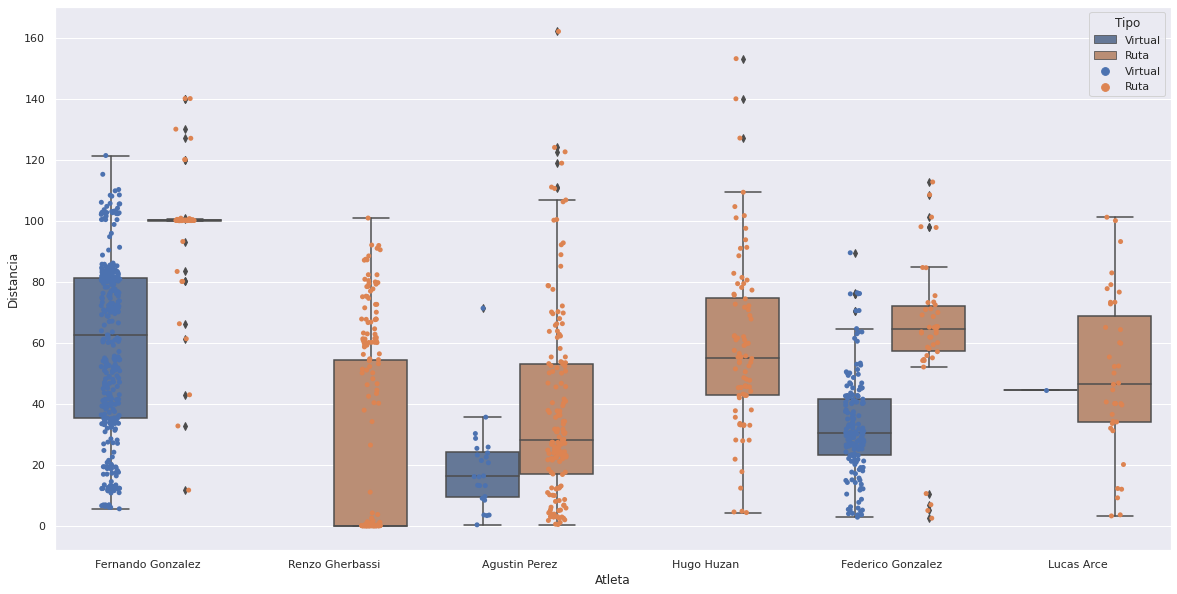

In [369]:
plt.figure(figsize = (20,10))
sns.stripplot(data = df,
                x = "Atleta",
                y ="Distancia", 
                hue = "Tipo",
                dodge = True,
              )

sns.boxplot(data = df,
            saturation = 0.5,
                x = "Atleta",
                y ="Distancia", 
                hue = "Tipo")

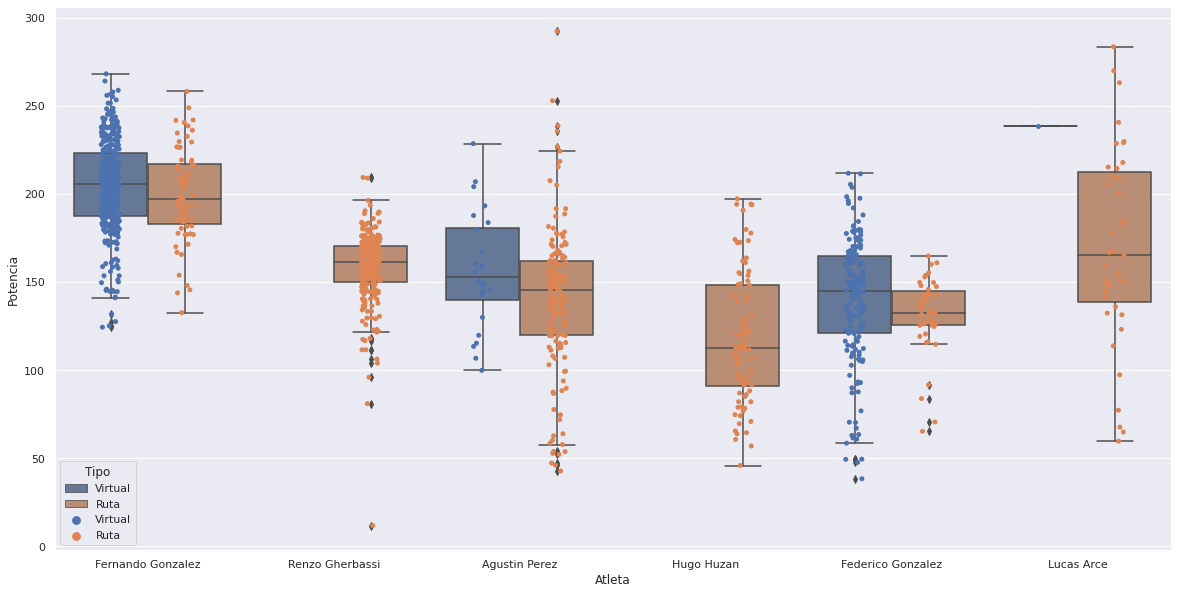

In [373]:
plt.figure(figsize = (20,10))
sns.stripplot(data = df,
                x = "Atleta",
                y ="Potencia", 
                hue = "Tipo",
                dodge = True,
              )

sns.boxplot(data = df,
            saturation = 0.5,
                x = "Atleta",
                y ="Potencia", 
                hue = "Tipo")

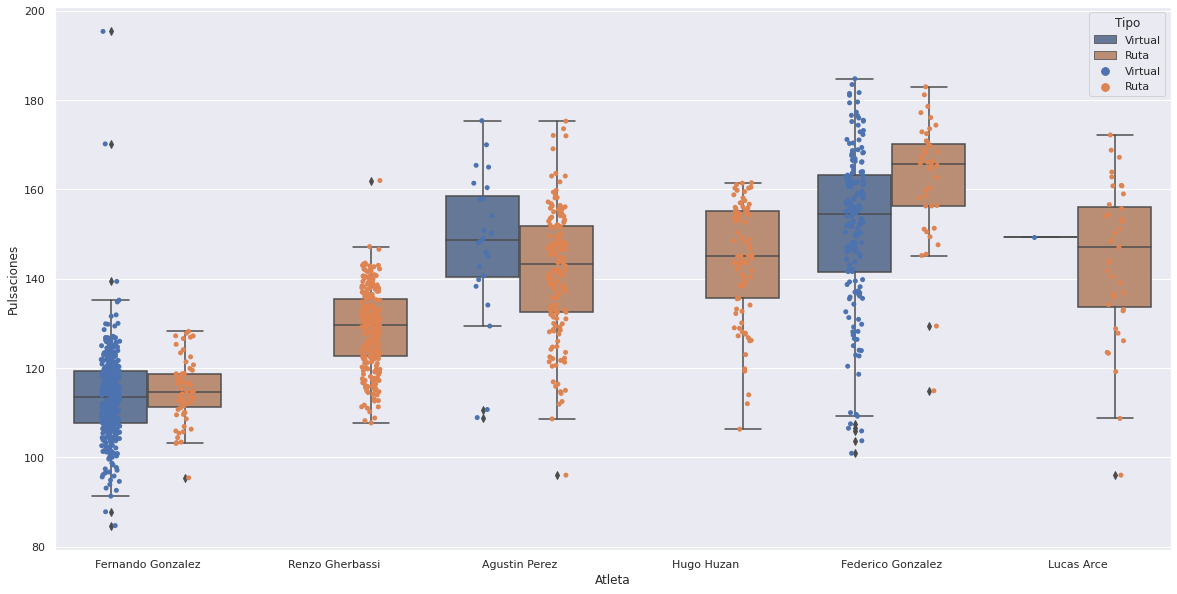

In [374]:
plt.figure(figsize = (20,10))
sns.stripplot(data = df,
                x = "Atleta",
                y ="Pulsaciones", 
                hue = "Tipo",
                dodge = True,
              )

sns.boxplot(data = df,
            saturation = 0.5,
                x = "Atleta",
                y ="Pulsaciones", 
                hue = "Tipo")

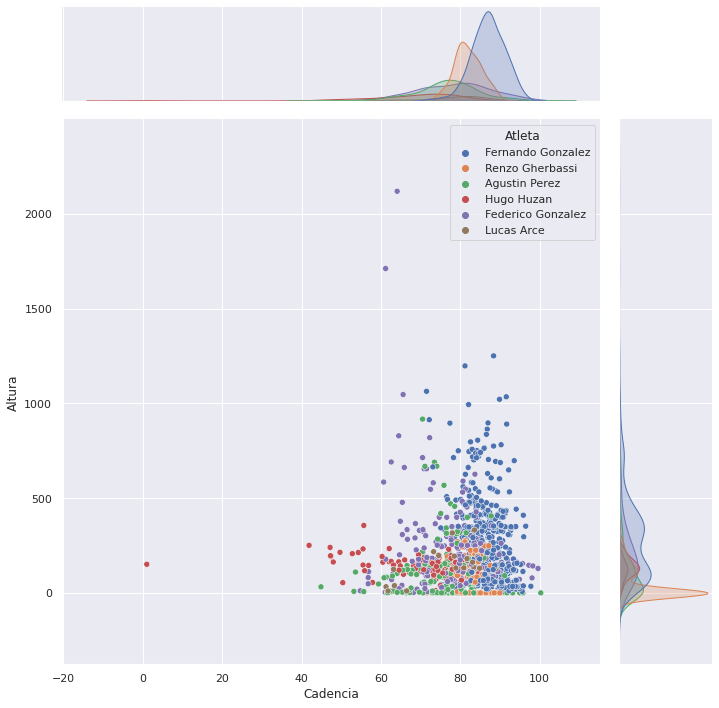

In [370]:
sns.jointplot(data = df,
           x= "Cadencia",
           y = "Altura", 
           hue = "Atleta",
           height=10,)

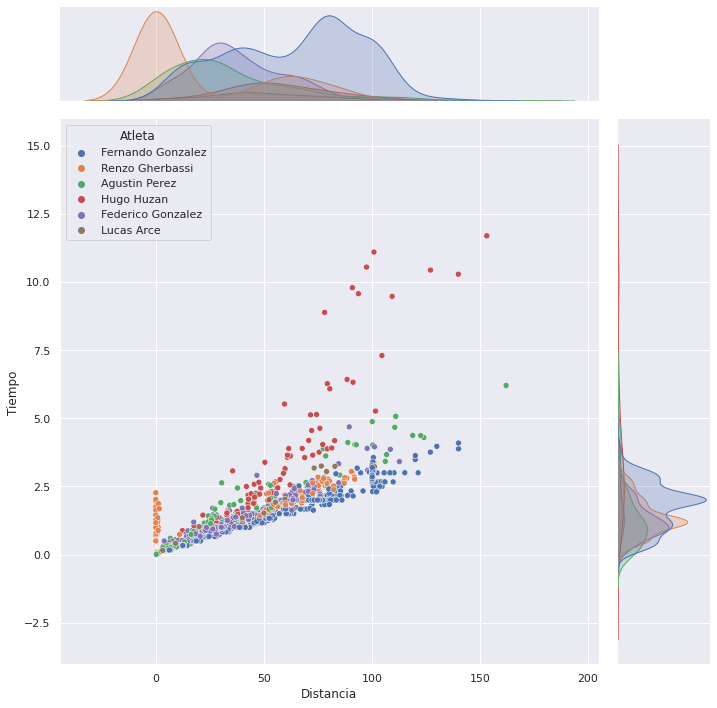

In [371]:
sns.jointplot(data = df,
           x= "Distancia",
           y = "Tiempo", 
           hue = "Atleta",
           height=10,)

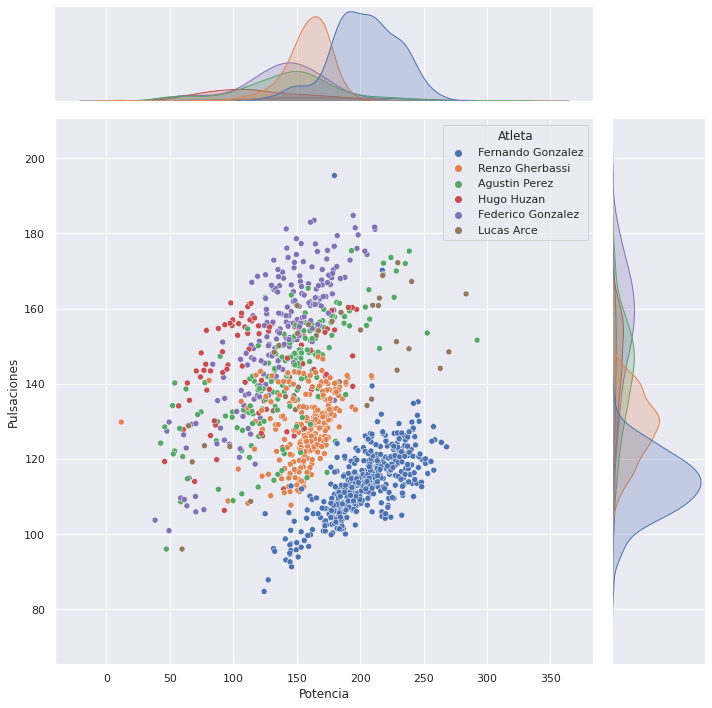

In [372]:
sns.jointplot(data = df,
           x= "Potencia",
           y = "Pulsaciones", 
           hue = "Atleta",
           height=10)